<a href="https://colab.research.google.com/github/dokim94/Deep-learning-study/blob/main/mnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf.random.set_seed(55)
import pandas as pd
import time

In [5]:
mnist = tf.keras.datasets.mnist
(x_train_org, y_train),(x_test_org, y_test) = mnist.load_data()
print(x_train_org.shape, x_test_org.shape)
print(y_train, y_train.shape)

nb_classes = 10
Y_one_hot = tf.one_hot(y_train, nb_classes)
y_train = tf.transpose(tf.reshape(Y_one_hot, [-1, nb_classes]))
y_test = tf.transpose(tf.reshape(tf.one_hot(y_test, nb_classes), [-1, nb_classes]))
y_train, y_test = np.asarray(y_train), np.asarray(y_test)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
[5 0 4 ... 5 6 8] (60000,)


In [6]:
#input data info
m_train  = x_train_org.shape[0]
num_px = x_train_org.shape[1]
m_test = x_test_org.shape[0]

print("Number of training examples: " + str(m_train))
print("Number of testing examples: " + str(m_test))
print("Each image is of size: (" + str(num_px) + "," + str(num_px) + ",3)")
print("x_train_orig_shape: " + str(x_train_org.shape))
print("y_train_shape: " + str(y_train.shape))

Number of training examples: 60000
Number of testing examples: 10000
Each image is of size: (28,28,3)
x_train_orig_shape: (60000, 28, 28)
y_train_shape: (10, 60000)


In [7]:
#Reshape the training and test examples
x_train_flatten = x_train_org.reshape(x_train_org.shape[0], -1).T
x_test_flatten = x_test_org.reshape(x_test_org.shape[0], -1).T

x_train, x_test = x_train_flatten / 255.0, x_test_flatten / 255.0

print("x_train's shape: " + str(x_train.shape))
print("x_test's shape: " + str(x_test.shape))

x_train's shape: (784, 60000)
x_test's shape: (784, 10000)


In [8]:
n_x = 784
n_h = 7
n_y = 10
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.01

In [9]:
def initial_parameter_deep(layer_dims):
  tf.random.set_seed(55)
  parameters = {}
  L = len(layers_dims)

  for l in range(1, L):
    parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
    parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))

  return parameters

In [10]:
parameters = initial_parameter_deep(layers_dims)
#print("W1 = " + str(parameters["W1"]))
#print("b1 = " + str(parameters["b1"]))
#print("W2 = " + str(parameters["W2"]))
#print("b2 = " + str(parameters["b2"]))
parameters.keys()

dict_keys(['W1', 'b1', 'W2', 'b2'])

In [11]:
#activation functions
def sigmoid(z):
  A =  1 / (1 + np.exp(-z))
  return A

def relu(Z):
  A = np.maximum(0, Z)
  assert(A.shape == Z.shape)
  return A

def leakyrelu(Z):
  A = np.maximum(0.1*Z, Z)
  assert(A.shape == Z.shape)
  return A

def softmax(Z):
  A = np.exp(Z)
  A = A / A.sum(axis=0, keepdims=True)
  return A

def tanh(Z):
  A = (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))
  return A

def swish(Z):
  A = Z * sigmoid(Z)
  return A

In [12]:
def linear_forward(A, W, b):
  Z = np.dot(W, A) + b
  return Z

In [13]:
def linear_activation_forward(A_prev, W, b, activation):

  if activation == "sigmoid":
    Z = linear_forward(A_prev, W, b)
    A = sigmoid(Z)

  elif activation == "relu":
    Z = linear_forward(A_prev, W, b)
    A = relu(Z)
  
  elif activation == "leakyrelu":
    Z = linear_forward(A_prev, W, b)
    A = leakyrelu(Z)

  elif activation == "softmax":
    Z = linear_forward(A_prev, W, b)
    A = softmax(Z)

  elif activation == "tanh":
    Z = linear_forward(A_prev, W, b)
    A = tanh(Z)


  elif activation == "swish":
    Z = linear_forward(A_prev, W, b)
    A = swish(Z)

  cache = (A_prev, W, b, Z)

  return A, cache

In [56]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2 
    
    # Hidden layers 1 to L-1 will be relu
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], activation = "relu")
        caches.append(cache)
    
    #output layer L will be softmax
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], activation = "softmax")
    caches.append(cache)
    
    assert(AL.shape == (10, X.shape[1]))
    
    return AL, caches

In [16]:
AL, caches = L_model_forward(x_train, parameters)
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame(AL[:, 0:10])

,0,1,2,3,4,5,6,7,8,9
0,0.10027,0.07773,0.06280,0.11471,0.09557,0.09973,0.09202,0.09298,0.11441,0.10000
1,0.12575,0.13437,0.12937,0.12415,0.09025,0.09958,0.08414,0.11712,0.10136,0.10000
2,0.16988,0.17549,0.10127,0.11830,0.10473,0.10010,0.10715,0.13740,0.10666,0.10000
3,0.11729,0.13276,0.13407,0.10095,0.10543,0.10075,0.11279,0.11656,0.09684,0.10000
4,0.05808,0.07441,0.06278,0.07228,0.08082,0.10062,0.07712,0.07778,0.08213,0.10000
5,0.11953,0.08482,0.07556,0.09992,0.09824,0.09941,0.09368,0.10572,0.11617,0.10000
6,0.11832,0.11626,0.10652,0.12315,0.10248,0.09976,0.10170,0.11193,0.10356,0.10000
7,0.08298,0.11172,0.09300,0.07031,0.12260,0.09966,0.12972,0.09931,0.08545,0.10000
8,0.03979,0.04189,0.04596,0.06386,0.10484,0.09956,0.10362,0.05973,0.08713,0.10000
9,0.06811,0.05056,0.18867,0.11239,0.09503,0.10083,0.09806,0.08147,0.10629,0.10000


In [17]:
def compute_cost(AL, Y):
  m = Y.shape[1]

  cost = -1/m * np.sum(np.multiply(Y, np.log(AL)))
  cost = np.squeeze(cost)
  assert(cost.shape == ())

  return cost

In [18]:
compute_cost(AL, y_train)

2.310556149361134

In [27]:
def linear_backward(dZ, A_prev, W, b):
  m = A_prev.shape[1]

  dW = 1/m * np.dot(dZ, A_prev.T)
  db = 1/m * np.sum(dZ, axis=1, keepdims=True)
  dA_prev = np.dot(W.T, dZ)

  assert(dA_prev.shape == A_prev.shape)
  assert(dW.shape == W.shape)
  assert(db.shape == b.shape)

  return dA_prev, dW, db

In [28]:
def relu_backward(dA, cache):
  A_prev, W, b, Z = cache

  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  assert (dZ.shape == Z.shape)

  dA_prev, dW, db = linear_backward(dZ, A_prev, W, b)
  return dA_prev, dW, db


def softmax_backward(AL, Y, cache):
  A_prev, W, b, Z = cache
  dZ = AL - Y

  dA_prev, dW, db = linear_backward(dZ, A_prev, W, b)
  return dA_prev, dW, db

In [42]:
def L_model_backward(AL, Y, caches):
  grads = {}
  L = len(caches)
  m = AL.shape[1]

  current_cache = caches[L-1]
  grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = softmax_backward(AL, Y, current_cache)

  for l in reversed(range(L-1)):
    current_cache = caches[l]
    dA_prev_temp, dW_temp, db_temp = relu_backward(grads["dA" + str(l+1)], current_cache)
    grads["dA" + str(l)] = dA_prev_temp
    grads["dW" + str(l+1)] = dW_temp
    grads["db" + str(l+1)] = db_temp
  
  return grads

In [43]:
grads = L_model_backward(AL, y_train, caches)
grads.keys()

dict_keys(['dA1', 'dW2', 'db2', 'dA0', 'dW1', 'db1'])

In [44]:
def update_parameters(parameters, grads, learning_rate):
  L = len(parameters) // 2
  for l in range(L):
    parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
    parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

  return parameters

In [45]:
parameters = update_parameters(parameters, grads, learning_rate=0.0075)
AL, caches = L_model_forward(x_train, parameters)
pd.DataFrame(AL[:, 0:5])

,0,1,2,3,4
0,0.09952,0.07896,0.06289,0.11393,0.09583
1,0.12294,0.13149,0.12963,0.12215,0.09077
2,0.16430,0.16990,0.10115,0.11522,0.10449
3,0.11667,0.13107,0.13386,0.09983,0.10516
4,0.06025,0.07603,0.06311,0.07388,0.08177
5,0.12051,0.08710,0.07561,0.10039,0.09836
6,0.11740,0.11554,0.10645,0.12198,0.10237
7,0.08508,0.11200,0.09259,0.07180,0.12132
8,0.04240,0.04449,0.04596,0.06697,0.10462
9,0.07095,0.05341,0.18875,0.11387,0.09531


In [47]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=True):
  np.random.seed(55)
  costs = []

  #1. Initialize parameters
  parameters = initial_parameter_deep(layers_dims)

  for i in range(0, num_iterations):
    
    #2. Forward Propagation
    AL, caches = L_model_forward(X, parameters)

    #3. Compute Cost
    cost = compute_cost(AL, Y)

    #4. Backward Propagation
    grads = L_model_backward(AL, Y, caches)

    #5. Update Parameters
    parameters = update_parameters(parameters, grads, learning_rate)

    # Print the cost every 100 training examples
    if print_cost and i % 100 == 0:
      print("Cost after iteration %i: %f" %(i, cost))
    if print_cost and i % 10 == 0:
      costs.append(cost)

  
  # Plot the Cost
  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per tens)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show

  return parameters

In [48]:
def predict(X, parameters):
  # Foward Propagation
  probabilities, caches = L_model_forward(X, parameters)

  # Calculate Predictions (the highest probability for a given example is coded as 1, otherwise 0)
  predictions = (probabilities == np.amax(probabilities, axis=0, keepdims=True))
  predictions = predictions.astype(float)

  return predictions, probabilities

def evaluate_prediction(predictions, Y):
  m = Y.shape[1]
  predictions_class = predictions.argmax(axis=0).reshape(1,m)
  Y_class = Y.argmax(axis=0).reshape(1,m)

  return np.sum((predictions_class == Y_class)/m)

Cost after iteration 0: 2.420498
Cost after iteration 100: 1.800165
Cost after iteration 200: 1.468263
Cost after iteration 300: 1.224530
Cost after iteration 400: 1.030690
Train set error is:0.7381000000000002
Test set error is:0.7371000000000003


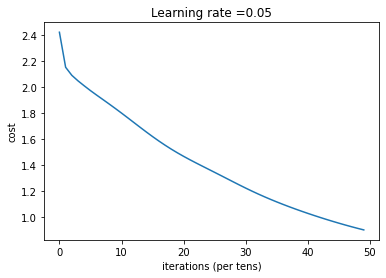

In [51]:
layers_dims = [784, 5, 10]
parameters = L_layer_model(x_train, y_train, layers_dims, learning_rate = 0.05, num_iterations = 500, print_cost=True)
pred_train, probs_train = predict(x_train, parameters)
print("Train set error is:" + str(evaluate_prediction(pred_train, y_train)))
pred_test, probs_test = predict(x_test, parameters)
print("Test set error is:" + str(evaluate_prediction(pred_test, y_test)))

Cost after iteration 0: 2.420498
Cost after iteration 100: 2.088695
Cost after iteration 200: 2.007614
Cost after iteration 300: 1.936378
Cost after iteration 400: 1.868496
Train set error is:0.39860000000000007
Test set error is:0.3941


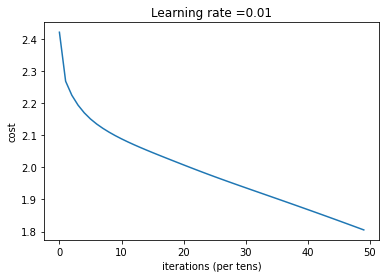

In [52]:
layers_dims = [784, 5, 10]
parameters = L_layer_model(x_train, y_train, layers_dims, learning_rate = 0.01, num_iterations = 500, print_cost=True)
pred_train, probs_train = predict(x_train, parameters)
print("Train set error is:" + str(evaluate_prediction(pred_train, y_train)))
pred_test, probs_test = predict(x_test, parameters)
print("Test set error is:" + str(evaluate_prediction(pred_test, y_test)))

Cost after iteration 0: 2.420498
Cost after iteration 100: 1.800165
Cost after iteration 200: 1.468263
Cost after iteration 300: 1.224530
Cost after iteration 400: 1.030690
Cost after iteration 500: 0.892304
Cost after iteration 600: 0.799244
Cost after iteration 700: 0.734259
Cost after iteration 800: 0.681829
Cost after iteration 900: 0.634714
Train set error is:0.8295333333333335
Test set error is:0.8343000000000003


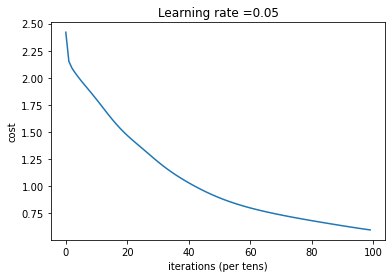

In [58]:
layers_dims = [784, 5, 10]
parameters = L_layer_model(x_train, y_train, layers_dims, learning_rate = 0.05, num_iterations = 1000, print_cost=True)
pred_train, probs_train = predict(x_train, parameters)
print("Train set error is:" + str(evaluate_prediction(pred_train, y_train)))
pred_test, probs_test = predict(x_test, parameters)
print("Test set error is:" + str(evaluate_prediction(pred_test, y_test)))

Cost after iteration 0: 2.420498
Cost after iteration 100: 2.088695
Cost after iteration 200: 2.007614
Cost after iteration 300: 1.936378
Cost after iteration 400: 1.868496
Cost after iteration 500: 1.798168
Cost after iteration 600: 1.725231
Cost after iteration 700: 1.652578
Cost after iteration 800: 1.583896
Cost after iteration 900: 1.521517
Cost after iteration 1000: 1.465750
Cost after iteration 1100: 1.414765
Cost after iteration 1200: 1.365674
Cost after iteration 1300: 1.316473
Cost after iteration 1400: 1.266964
Cost after iteration 1500: 1.219003
Cost after iteration 1600: 1.174212
Cost after iteration 1700: 1.132889
Cost after iteration 1800: 1.094701
Cost after iteration 1900: 1.059095
Train set error is:0.6983166666666668
Test set error is:0.7009000000000001


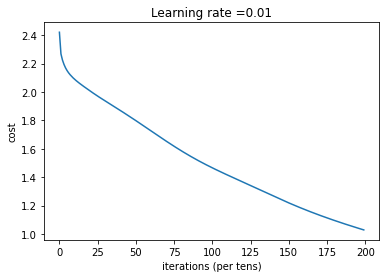

In [59]:
layers_dims = [784, 5, 10]
parameters = L_layer_model(x_train, y_train, layers_dims, learning_rate = 0.01, num_iterations = 2000, print_cost=True)
pred_train, probs_train = predict(x_train, parameters)
print("Train set error is:" + str(evaluate_prediction(pred_train, y_train)))
pred_test, probs_test = predict(x_test, parameters)
print("Test set error is:" + str(evaluate_prediction(pred_test, y_test)))